# Importing data from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hotsonhonet","key":"e6cb444362df8bdc68a95a96af34b13c"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hotsonhonet/the-great-indian-hiring-challenge

  0% 0.00/6.50M [00:00<?, ?B/s]
100% 6.50M/6.50M [00:00<00:00, 60.0MB/s]


In [ ]:
!ls

kaggle.json  sample_data  the-great-indian-hiring-challenge.zip


In [ ]:
from zipfile import ZipFile

with ZipFile("the-great-indian-hiring-challenge.zip", "r") as file:
    file.extractall()
file.close()

In [ ]:
!ls Participants_Data_TGIH

'Sample Submission.csv'   Test.csv   Train.csv


In [ ]:
!pwd

/content


In [ ]:
train_loc = "/content/Participants_Data_TGIH/Train.csv"
test_loc = "/content/Participants_Data_TGIH/Test.csv"

# Importing Modules

In [ ]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline

# Loading Data

In [ ]:
train_data = pd.read_csv(train_loc)
test_data = pd.read_csv(test_loc)

In [ ]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
test_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


# EDA

In [ ]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
train_data.shape

(284780, 8)

In [ ]:
label = train_data["UnitPrice"]
features = train_data.drop(["UnitPrice"], axis = 1)
features.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35


In [ ]:
t_features = test_data.copy()
t_features.shape

(122049, 7)

In [ ]:
train_limit = features.shape[0]
train_limit

284780

## Concatenating train and test features for EDA

In [ ]:
tntt_features = pd.concat([features, t_features], axis = 0)
tntt_features

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35
...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35


## EDA on Date

In [ ]:
tntt_features.loc[:, "Date"] = tntt_features.InvoiceDate.apply(lambda x: x.split()[0])
tntt_features.loc[:, "Time"] = tntt_features.InvoiceDate.apply(lambda x: x.split()[1])

In [ ]:
tntt_features.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time
270880,852,1788,751,1,2010-12-12 11:06:00,17251.0,35,2010-12-12,11:06:00
601,2009,667,3632,1,2011-01-21 11:19:00,17890.0,35,2011-01-21,11:19:00


In [ ]:
tntt_features.loc[:, "Date"] = pd.to_datetime(tntt_features['Date'])

tntt_features.loc[:, 'year'] = tntt_features.Date.dt.year
tntt_features.loc[:, 'weekofyear'] = tntt_features.Date.dt.weekofyear
tntt_features.loc[:, 'month'] = tntt_features.Date.dt.month
tntt_features.loc[:, 'dayofweek'] = tntt_features.Date.dt.dayofweek
tntt_features.loc[:, 'weekend'] = (tntt_features.Date.dt.weekday>=5).astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
tntt_features.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend
59003,12557,2120,3338,12,2011-09-22 12:00:00,13089.0,35,2011-09-22,12:00:00,2011,38,9,3,0
36578,12849,1087,420,4,2011-09-27 10:04:00,13704.0,35,2011-09-27,10:04:00,2011,39,9,1,0
210888,3811,757,2713,6,2011-03-11 09:39:00,16475.0,35,2011-03-11,09:39:00,2011,10,3,4,0


In [ ]:
tntt_features.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,year,weekofyear,month,dayofweek,weekend
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,9950.901755,1573.257501,2024.692726,12.061303,15287.690570,32.827731,2010.934002,30.936184,7.605947,2.606402,0.155439
std,5552.295845,844.054584,1089.177346,248.693370,1713.600303,6.738565,0.248279,14.765548,3.418942,1.921907,0.362323
min,0.000000,0.000000,0.000000,-80995.000000,12346.000000,0.000000,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,13953.000000,35.000000,2011.000000,19.000000,5.000000,1.000000,0.000000
50%,10310.000000,1522.000000,1987.000000,5.000000,15152.000000,35.000000,2011.000000,34.000000,8.000000,2.000000,0.000000
75%,14651.000000,2106.000000,2945.000000,12.000000,16791.000000,35.000000,2011.000000,44.000000,11.000000,4.000000,0.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,18287.000000,36.000000,2011.000000,51.000000,12.000000,6.000000,1.000000


In [ ]:
interested_cols = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'CustomerID', 'Country',
                   'Date', 'Time', 'year', 'weekofyear', 'month', 'dayofweek', 'weekend' ]
interested_cols

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'CustomerID',
 'Country',
 'Date',
 'Time',
 'year',
 'weekofyear',
 'month',
 'dayofweek',
 'weekend']

## Pattern finding with CustomerID, StockCode and InvoiceNo

In [ ]:
interested_cols_Cus = [d for d in list(tntt_features.columns) if (d != "CustomerID") ]
interested_cols_Stcd = [d for d in list(tntt_features.columns) if (d != "StockCode") ]
interested_cols_In = [d for d in list(tntt_features.columns) if (d != "InvoiceNo") ]

### Making groupbys as per the customerID

In [ ]:
temp_Cus_pattern = tntt_features.groupby(['CustomerID'])[interested_cols_Cus].count()
temp_Cus_pattern = temp_Cus_pattern.reset_index()
temp_Cus_pattern.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Country,Date,Time,year,weekofyear,month,dayofweek,weekend
0,12346.0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,12347.0,182,182,182,182,182,182,182,182,182,182,182,182,182
2,12348.0,31,31,31,31,31,31,31,31,31,31,31,31,31
3,12349.0,73,73,73,73,73,73,73,73,73,73,73,73,73
4,12350.0,17,17,17,17,17,17,17,17,17,17,17,17,17


In [ ]:
cus_InvoiceNo_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.InvoiceNo.values)))
cus_StockCode_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.StockCode.values)))
cus_Description_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.Description.values)))
cus_Quantity_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.Quantity.values)))
cus_InvoiceDate_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.InvoiceDate.values)))
cus_Country_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.Country.values)))
cus_Date_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.Date.values)))
cus_Time_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.Time.values)))

cus_year_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.year.values)))
cus_weekofyear_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.weekofyear.values)))
cus_month_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.month.values)))
cus_dayofweek_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.dayofweek.values)))
cus_weekend_group = dict(zip(list(temp_Cus_pattern.CustomerID.values), list(temp_Cus_pattern.weekend.values)))

In [ ]:
tntt_features["cus_InvoiceNo_group"] = tntt_features.CustomerID.apply(lambda x : cus_InvoiceNo_group[x])
tntt_features["cus_StockCode_group"] = tntt_features.CustomerID.apply(lambda x : cus_StockCode_group[x])
tntt_features["cus_Description_group"] = tntt_features.CustomerID.apply(lambda x : cus_Description_group[x])
tntt_features["cus_Quantity_group"] = tntt_features.CustomerID.apply(lambda x : cus_Quantity_group[x])
tntt_features["cus_InvoiceDate_group"] = tntt_features.CustomerID.apply(lambda x : cus_InvoiceDate_group[x])
tntt_features["cus_Country_group"] = tntt_features.CustomerID.apply(lambda x : cus_Country_group[x])
tntt_features["cus_Date_group"] = tntt_features.CustomerID.apply(lambda x : cus_Date_group[x])
tntt_features["cus_Time_group"] = tntt_features.CustomerID.apply(lambda x : cus_Time_group[x])

tntt_features["cus_year_group"] = tntt_features.CustomerID.apply(lambda x : cus_year_group[x])
tntt_features["cus_weekofyear_group"] = tntt_features.CustomerID.apply(lambda x : cus_weekofyear_group[x])
tntt_features["cus_month_group"] = tntt_features.CustomerID.apply(lambda x : cus_month_group[x])
tntt_features["cus_dayofweek_group"] = tntt_features.CustomerID.apply(lambda x : cus_dayofweek_group[x])
tntt_features["cus_weekend_group"] = tntt_features.CustomerID.apply(lambda x : cus_weekend_group[x])

tntt_features.sample(3) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group
224906,17935,1611,1857,4,2011-12-02 13:21:00,15311.0,35,2011-12-02,13:21:00,2011,48,12,4,0,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491
80629,16565,2160,1106,1,2011-11-17 14:08:00,17397.0,35,2011-11-17,14:08:00,2011,46,11,3,0,92,92,92,92,92,92,92,92,92,92,92,92,92
14967,2701,659,2906,6,2011-02-10 09:21:00,13706.0,35,2011-02-10,09:21:00,2011,6,2,3,0,20,20,20,20,20,20,20,20,20,20,20,20,20


### Making groupbys as per StockCode

In [ ]:
temp_stcd_pattern = tntt_features.groupby(['StockCode'])[interested_cols_Stcd].count()
temp_stcd_pattern = temp_stcd_pattern.reset_index()
temp_stcd_pattern.sample()

,StockCode,InvoiceNo,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend
1139,1139,39,39,39,39,39,39,39,39,39,39,39,39,39


In [ ]:
stcd_InvoiceNo_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.InvoiceNo.values)))
stcd_CustomerID_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.CustomerID.values)))
stcd_Description_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.Description.values)))
stcd_Quantity_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.Quantity.values)))
stcd_InvoiceDate_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.InvoiceDate.values)))
stcd_Country_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.Country.values)))
stcd_Date_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.Date.values)))
stcd_Time_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.Time.values)))

stcd_year_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.year.values)))
stcd_weekofyear_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.weekofyear.values)))
stcd_month_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.month.values)))
stcd_dayofweek_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.dayofweek.values)))
stcd_weekend_group = dict(zip(list(temp_stcd_pattern.StockCode.values), list(temp_stcd_pattern.weekend.values)))

In [ ]:
tntt_features["stcd_InvoiceNo_group"] = tntt_features.StockCode.apply(lambda x : stcd_InvoiceNo_group[x])
tntt_features["stcd_CustomerID_group"] = tntt_features.StockCode.apply(lambda x : stcd_CustomerID_group[x])
tntt_features["stcd_Description_group"] = tntt_features.StockCode.apply(lambda x : stcd_Description_group[x])
tntt_features["stcd_Quantity_group"] = tntt_features.StockCode.apply(lambda x : stcd_Quantity_group[x])
tntt_features["stcd_InvoiceDate_group"] = tntt_features.StockCode.apply(lambda x : stcd_InvoiceDate_group[x])
tntt_features["stcd_Country_group"] = tntt_features.StockCode.apply(lambda x : stcd_Country_group[x])
tntt_features["stcd_Date_group"] = tntt_features.StockCode.apply(lambda x : stcd_Date_group[x])
tntt_features["stcd_Time_group"] = tntt_features.StockCode.apply(lambda x : stcd_Time_group[x])

tntt_features["stcd_year_group"] = tntt_features.StockCode.apply(lambda x : stcd_year_group[x])
tntt_features["stcd_weekofyear_group"] = tntt_features.StockCode.apply(lambda x : stcd_weekofyear_group[x])
tntt_features["stcd_month_group"] = tntt_features.StockCode.apply(lambda x : stcd_month_group[x])
tntt_features["stcd_dayofweek_group"] = tntt_features.StockCode.apply(lambda x : stcd_dayofweek_group[x])
tntt_features["stcd_weekend_group"] = tntt_features.StockCode.apply(lambda x : stcd_weekend_group[x])

tntt_features.sample(3) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group
8793,20260,399,1396,-12,2011-06-13 16:14:00,13012.0,35,2011-06-13,16:14:00,2011,24,6,0,0,107,107,107,107,107,107,107,107,107,107,107,107,107,708,708,708,708,708,708,708,708,708,708,708,708,708
221189,2046,1336,1617,3,2011-01-23 12:41:00,15167.0,35,2011-01-23,12:41:00,2011,3,1,6,1,41,41,41,41,41,41,41,41,41,41,41,41,41,835,835,835,835,835,835,835,835,835,835,835,835,835
93554,202,986,2326,12,2010-12-02 14:47:00,17581.0,35,2010-12-02,14:47:00,2010,48,12,3,0,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452


### Making groupbys as per InvoiceNo

In [ ]:
temp_In_pattern = tntt_features.groupby(['InvoiceNo'])[interested_cols_In].count()
temp_In_pattern = temp_In_pattern.reset_index()
temp_In_pattern.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend
498,498,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
In_CustomerID_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.CustomerID.values)))
In_StockCode_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.StockCode.values)))
In_Description_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.Description.values)))
In_Quantity_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.Quantity.values)))
In_InvoiceDate_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.InvoiceDate.values)))
In_Country_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.Country.values)))
In_Date_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.Date.values)))
In_Time_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.Time.values)))
In_year_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.year.values)))
In_weekofyear_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.weekofyear.values)))
In_month_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.month.values)))
In_dayofweek_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.dayofweek.values)))
In_weekend_group = dict(zip(list(temp_In_pattern.InvoiceNo.values), list(temp_In_pattern.weekend.values)))

In [ ]:
tntt_features["In_CustomerID_group"] = tntt_features.InvoiceNo.apply(lambda x : In_CustomerID_group[x])
tntt_features["In_StockCode_group"] = tntt_features.InvoiceNo.apply(lambda x : In_StockCode_group[x])
tntt_features["In_Description_group"] = tntt_features.InvoiceNo.apply(lambda x : In_Description_group[x])
tntt_features["In_Quantity_group"] = tntt_features.InvoiceNo.apply(lambda x : In_Quantity_group[x])
tntt_features["In_InvoiceDate_group"] = tntt_features.InvoiceNo.apply(lambda x : In_InvoiceDate_group[x])
tntt_features["In_Country_group"] = tntt_features.InvoiceNo.apply(lambda x : In_Country_group[x])
tntt_features["In_Date_group"] = tntt_features.InvoiceNo.apply(lambda x : In_Date_group[x])
tntt_features["In_Time_group"] = tntt_features.InvoiceNo.apply(lambda x : In_Time_group[x])
tntt_features["In_year_group"] = tntt_features.InvoiceNo.apply(lambda x : In_year_group[x])
tntt_features["In_weekofyear_group"] = tntt_features.InvoiceNo.apply(lambda x : In_weekofyear_group[x])
tntt_features["In_month_group"] = tntt_features.InvoiceNo.apply(lambda x : In_month_group[x])
tntt_features["In_dayofweek_group"] = tntt_features.InvoiceNo.apply(lambda x : In_dayofweek_group[x])
tntt_features["In_weekend_group"] = tntt_features.InvoiceNo.apply(lambda x : In_weekend_group[x])

tntt_features.sample(3) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,In_CustomerID_group,In_StockCode_group,In_Description_group,In_Quantity_group,In_InvoiceDate_group,In_Country_group,In_Date_group,In_Time_group,In_year_group,In_weekofyear_group,In_month_group,In_dayofweek_group,In_weekend_group
154961,7830,2128,3031,12,2011-06-09 11:40:00,16592.0,35,2011-06-09,11:40:00,2011,23,6,3,0,222,222,222,222,222,222,222,222,222,222,222,222,222,213,213,213,213,213,213,213,213,213,213,213,213,213,2,2,2,2,2,2,2,2,2,2,2,2,2
132412,2735,269,1347,2,2011-02-10 16:17:00,14081.0,35,2011-02-10,16:17:00,2011,6,2,3,0,156,156,156,156,156,156,156,156,156,156,156,156,156,19,19,19,19,19,19,19,19,19,19,19,19,19,84,84,84,84,84,84,84,84,84,84,84,84,84
98626,10701,2900,70,1,2011-08-15 10:53:00,16272.0,35,2011-08-15,10:53:00,2011,33,8,0,0,25,25,25,25,25,25,25,25,25,25,25,25,25,64,64,64,64,64,64,64,64,64,64,64,64,64,25,25,25,25,25,25,25,25,25,25,25,25,25


## Quatity Type

In [ ]:
tntt_features["Quatity_type"] = tntt_features["Quantity"].apply(lambda x: -1 if (x<0) else 1)
tntt_features.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,In_CustomerID_group,In_StockCode_group,In_Description_group,In_Quantity_group,In_InvoiceDate_group,In_Country_group,In_Date_group,In_Time_group,In_year_group,In_weekofyear_group,In_month_group,In_dayofweek_group,In_weekend_group,Quatity_type
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,2011-05-06,16:54:00,2011,18,5,4,0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,491,491,491,491,491,491,491,491,491,491,491,491,491,44,44,44,44,44,44,44,44,44,44,44,44,44,1
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,2011-05-11,07:35:00,2011,19,5,2,0,605,605,605,605,605,605,605,605,605,605,605,605,605,282,282,282,282,282,282,282,282,282,282,282,282,282,42,42,42,42,42,42,42,42,42,42,42,42,42,1
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,2011-11-20,13:20:00,2011,46,11,6,1,461,461,461,461,461,461,461,461,461,461,461,461,461,475,475,475,475,475,475,475,475,475,475,475,475,475,66,66,66,66,66,66,66,66,66,66,66,66,66,1
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,2011-11-22,12:07:00,2011,47,11,1,0,180,180,180,180,180,180,180,180,180,180,180,180,180,480,480,480,480,480,480,480,480,480,480,480,480,480,40,40,40,40,40,40,40,40,40,40,40,40,40,1
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,2011-05-06,09:00:00,2011,18,5,4,0,138,138,138,138,138,138,138,138,138,138,138,138,138,156,156,156,156,156,156,156,156,156,156,156,156,156,44,44,44,44,44,44,44,44,44,44,44,44,44,1


## Max Element in each featureColumn

In [ ]:
tntt_features_cols = tntt_features.columns.tolist()

for col in tntt_features_cols:
    max_val_in_col = tntt_features[col].max()
    tntt_features[f"Max_{col}"] = tntt_features[col].apply(lambda x: 1 if (x==max_val_in_col) else 0)
    
tntt_features.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,...,Max_cus_InvoiceNo_group,Max_cus_StockCode_group,Max_cus_Description_group,Max_cus_Quantity_group,Max_cus_InvoiceDate_group,Max_cus_Country_group,Max_cus_Date_group,Max_cus_Time_group,Max_cus_year_group,Max_cus_weekofyear_group,Max_cus_month_group,Max_cus_dayofweek_group,Max_cus_weekend_group,Max_stcd_InvoiceNo_group,Max_stcd_CustomerID_group,Max_stcd_Description_group,Max_stcd_Quantity_group,Max_stcd_InvoiceDate_group,Max_stcd_Country_group,Max_stcd_Date_group,Max_stcd_Time_group,Max_stcd_year_group,Max_stcd_weekofyear_group,Max_stcd_month_group,Max_stcd_dayofweek_group,Max_stcd_weekend_group,Max_In_CustomerID_group,Max_In_StockCode_group,Max_In_Description_group,Max_In_Quantity_group,Max_In_InvoiceDate_group,Max_In_Country_group,Max_In_Date_group,Max_In_Time_group,Max_In_year_group,Max_In_weekofyear_group,Max_In_month_group,Max_In_dayofweek_group,Max_In_weekend_group,Max_Quatity_type
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,2011-05-06,16:54:00,2011,18,5,4,0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,491,491,491,491,491,491,491,491,491,491,491,491,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,2011-05-11,07:35:00,2011,19,5,2,0,605,605,605,605,605,605,605,605,605,605,605,605,605,282,282,282,282,282,282,282,282,282,282,282,282,282,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,2011-11-20,13:20:00,2011,46,11,6,1,461,461,461,461,461,461,461,461,461,461,461,461,461,475,475,475,475,475,475,475,475,475,475,475,475,475,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,2011-11-22,12:07:00,2011,47,11,1,0,180,180,180,180,180,180,180,180,180,180,180,180,180,480,480,480,480,480,480,480,480,480,480,480,480,480,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,2011-05-06,09:00:00,2011,18,5,4,0,138,138,138,138,138,138,138,138,138,138,138,138,138,156,156,156,156,156,156,156,156,156,156,156,156,156,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## More EDA on Date and Time



1. I would like to see if the purchases are done after 12 i.e by diving before and after 12 hrs purchases.
2. Which month has the most before 12 hrs purchases ?
3. In weekends, the purchases are done in day or night(as per IST 😁) ?
4. What is the pattern of StockCode with month, Time and year ?
5. Which has the most after 12 purchases ?









In [ ]:
tntt_features['InvoiceDate'] = pd.to_datetime(tntt_features.InvoiceDate, format='%Y-%m-%d %H:%M:%S')

In [ ]:
tntt_features['hour'] = tntt_features['InvoiceDate'].dt.hour
tntt_features['minute'] = tntt_features['InvoiceDate'].dt.minute
tntt_features['second'] = tntt_features['InvoiceDate'].dt.second

In [ ]:
tntt_features["After_12_purchase"] = tntt_features.hour.apply(lambda x: x if (x>=12) else 0)
tntt_features

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,...,Max_cus_InvoiceDate_group,Max_cus_Country_group,Max_cus_Date_group,Max_cus_Time_group,Max_cus_year_group,Max_cus_weekofyear_group,Max_cus_month_group,Max_cus_dayofweek_group,Max_cus_weekend_group,Max_stcd_InvoiceNo_group,Max_stcd_CustomerID_group,Max_stcd_Description_group,Max_stcd_Quantity_group,Max_stcd_InvoiceDate_group,Max_stcd_Country_group,Max_stcd_Date_group,Max_stcd_Time_group,Max_stcd_year_group,Max_stcd_weekofyear_group,Max_stcd_month_group,Max_stcd_dayofweek_group,Max_stcd_weekend_group,Max_In_CustomerID_group,Max_In_StockCode_group,Max_In_Description_group,Max_In_Quantity_group,Max_In_InvoiceDate_group,Max_In_Country_group,Max_In_Date_group,Max_In_Time_group,Max_In_year_group,Max_In_weekofyear_group,Max_In_month_group,Max_In_dayofweek_group,Max_In_weekend_group,Max_Quatity_type,hour,minute,second,After_12_purchase
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,2011-05-06,16:54:00,2011,18,5,4,0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,491,491,491,491,491,491,491,491,491,491,491,491,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,54,0,16
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,2011-05-11,07:35:00,2011,19,5,2,0,605,605,605,605,605,605,605,605,605,605,605,605,605,282,282,282,282,282,282,282,282,282,282,282,282,282,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,35,0,0
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,2011-11-20,13:20:00,2011,46,11,6,1,461,461,461,461,461,461,461,461,461,461,461,461,461,475,475,475,475,475,475,475,475,475,475,475,475,475,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,20,0,13
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,2011-11-22,12:07:00,2011,47,11,1,0,180,180,180,180,180,180,180,180,180,180,180,180,180,480,480,480,480,480,480,480,480,480,480,480,480,480,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,7,0,12
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,2011-05-06,09:00:00,2011,18,5,4,0,138,138,138,138,138,138,138,138,138,138,138,138,138,156,156,156,156,156,156,156,156,156,156,156,156,156,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35,2011-06-09,09:44:00,2011,23,6,3,0,110,110,110,110,110,110,110,110,110,110,110,110,110,18,18,18,18,18,18,18,18,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,44,0,0
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35,2011-06-28,15:47:00,2011,26,6,1,0,179,179,179,179,179,179,179,179,179,179,179,179,179,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,47,0,15
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35,2010-12-13,12:26:00,2010,50,12,0,0,925,925,925,925,925,925,925,925,925,925,925,925,925,338,338,338,338,338,338,338,338,338,338,338,338,338,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Customer having the most purchases

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


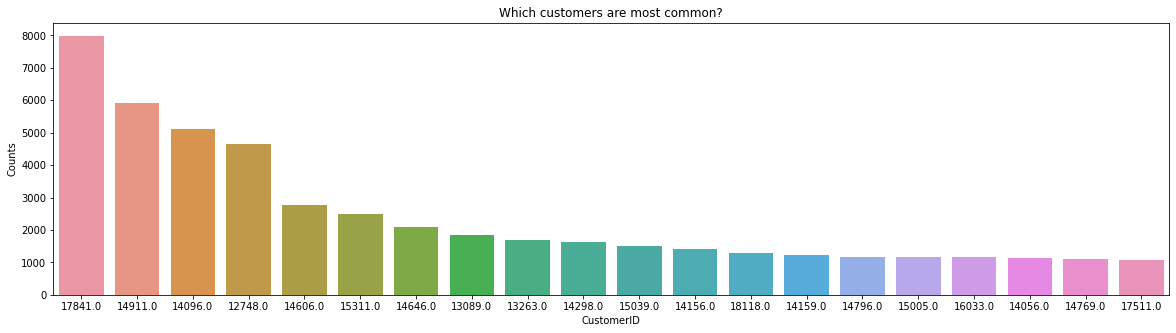

In [ ]:
customer_counts = tntt_features.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

From this we observe that Customer having CustomerID of '17841.0' has the most purchases

In [ ]:
tntt_features["CmnCustomer"] = tntt_features.CustomerID.apply(lambda x: 1 if (x==17841.0) else 0)
tntt_features.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,...,Max_cus_Country_group,Max_cus_Date_group,Max_cus_Time_group,Max_cus_year_group,Max_cus_weekofyear_group,Max_cus_month_group,Max_cus_dayofweek_group,Max_cus_weekend_group,Max_stcd_InvoiceNo_group,Max_stcd_CustomerID_group,Max_stcd_Description_group,Max_stcd_Quantity_group,Max_stcd_InvoiceDate_group,Max_stcd_Country_group,Max_stcd_Date_group,Max_stcd_Time_group,Max_stcd_year_group,Max_stcd_weekofyear_group,Max_stcd_month_group,Max_stcd_dayofweek_group,Max_stcd_weekend_group,Max_In_CustomerID_group,Max_In_StockCode_group,Max_In_Description_group,Max_In_Quantity_group,Max_In_InvoiceDate_group,Max_In_Country_group,Max_In_Date_group,Max_In_Time_group,Max_In_year_group,Max_In_weekofyear_group,Max_In_month_group,Max_In_dayofweek_group,Max_In_weekend_group,Max_Quatity_type,hour,minute,second,After_12_purchase,CmnCustomer
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,2011-05-06,16:54:00,2011,18,5,4,0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,491,491,491,491,491,491,491,491,491,491,491,491,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,54,0,16,0
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,2011-05-11,07:35:00,2011,19,5,2,0,605,605,605,605,605,605,605,605,605,605,605,605,605,282,282,282,282,282,282,282,282,282,282,282,282,282,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,35,0,0,0
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,2011-11-20,13:20:00,2011,46,11,6,1,461,461,461,461,461,461,461,461,461,461,461,461,461,475,475,475,475,475,475,475,475,475,475,475,475,475,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,20,0,13,0
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,2011-11-22,12:07:00,2011,47,11,1,0,180,180,180,180,180,180,180,180,180,180,180,180,180,480,480,480,480,480,480,480,480,480,480,480,480,480,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,7,0,12,0
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,2011-05-06,09:00:00,2011,18,5,4,0,138,138,138,138,138,138,138,138,138,138,138,138,138,156,156,156,156,156,156,156,156,156,156,156,156,156,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0,0,0,0


## New features



1.   unique stocks per customer
2.   unique Invoice per customer



## StockID having the most purchases

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


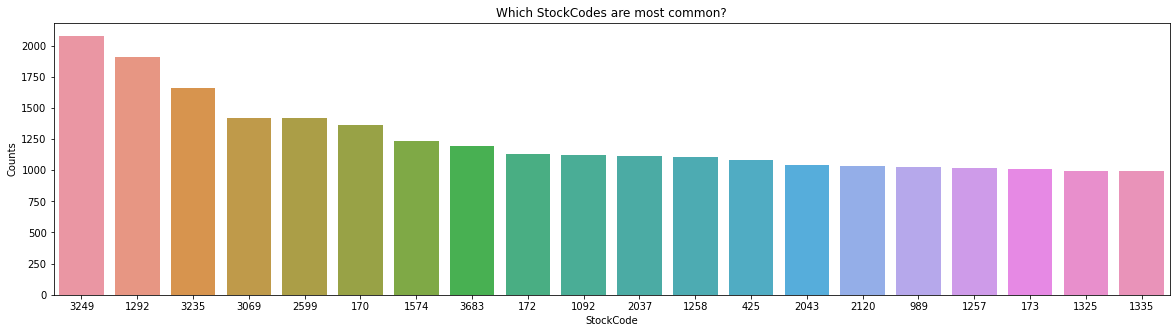

In [ ]:
StockCode_counts = tntt_features.StockCode.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(StockCode_counts.index, StockCode_counts.values, order=StockCode_counts.index)
plt.ylabel("Counts")
plt.xlabel("StockCode")
plt.title("Which StockCodes are most common?");

From this we observer that StockCode having value "3249" is most common

In [ ]:
tntt_features["CmnStockID"] = tntt_features.CustomerID.apply(lambda x: 1 if (x==3249) else 0)
tntt_features.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,...,Max_cus_Date_group,Max_cus_Time_group,Max_cus_year_group,Max_cus_weekofyear_group,Max_cus_month_group,Max_cus_dayofweek_group,Max_cus_weekend_group,Max_stcd_InvoiceNo_group,Max_stcd_CustomerID_group,Max_stcd_Description_group,Max_stcd_Quantity_group,Max_stcd_InvoiceDate_group,Max_stcd_Country_group,Max_stcd_Date_group,Max_stcd_Time_group,Max_stcd_year_group,Max_stcd_weekofyear_group,Max_stcd_month_group,Max_stcd_dayofweek_group,Max_stcd_weekend_group,Max_In_CustomerID_group,Max_In_StockCode_group,Max_In_Description_group,Max_In_Quantity_group,Max_In_InvoiceDate_group,Max_In_Country_group,Max_In_Date_group,Max_In_Time_group,Max_In_year_group,Max_In_weekofyear_group,Max_In_month_group,Max_In_dayofweek_group,Max_In_weekend_group,Max_Quatity_type,hour,minute,second,After_12_purchase,CmnCustomer,CmnStockID
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35,2011-05-06,16:54:00,2011,18,5,4,0,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,491,491,491,491,491,491,491,491,491,491,491,491,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,54,0,16,0,0
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35,2011-05-11,07:35:00,2011,19,5,2,0,605,605,605,605,605,605,605,605,605,605,605,605,605,282,282,282,282,282,282,282,282,282,282,282,282,282,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,35,0,0,0,0
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35,2011-11-20,13:20:00,2011,46,11,6,1,461,461,461,461,461,461,461,461,461,461,461,461,461,475,475,475,475,475,475,475,475,475,475,475,475,475,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,20,0,13,0,0
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35,2011-11-22,12:07:00,2011,47,11,1,0,180,180,180,180,180,180,180,180,180,180,180,180,180,480,480,480,480,480,480,480,480,480,480,480,480,480,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,7,0,12,0,0
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35,2011-05-06,09:00:00,2011,18,5,4,0,138,138,138,138,138,138,138,138,138,138,138,138,138,156,156,156,156,156,156,156,156,156,156,156,156,156,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0,0,0,0,0


## Checking variance of each column

In [ ]:
col_var = {}
tntt_features_cols = tntt_features.columns.tolist()

for col in tntt_features_cols:
    if(tntt_features[col].dtype == 'int64' or tntt_features[col].dtype == 'float64'):  
        col_var[col] = round((tntt_features[col].std())**2, 3)

In [ ]:
col_var_cols = list(col_var.keys())
col_var_var = list(col_var.values())

col_var = {"Columns":col_var_cols,
           "Variance":col_var_var}
col_var = pd.DataFrame(col_var)

In [ ]:
col_var.head()

,Columns,Variance
0,InvoiceNo,3.082799e+07
1,StockCode,7.124281e+05
2,Description,1.186307e+06
3,Quantity,6.184839e+04
4,CustomerID,2.936426e+06


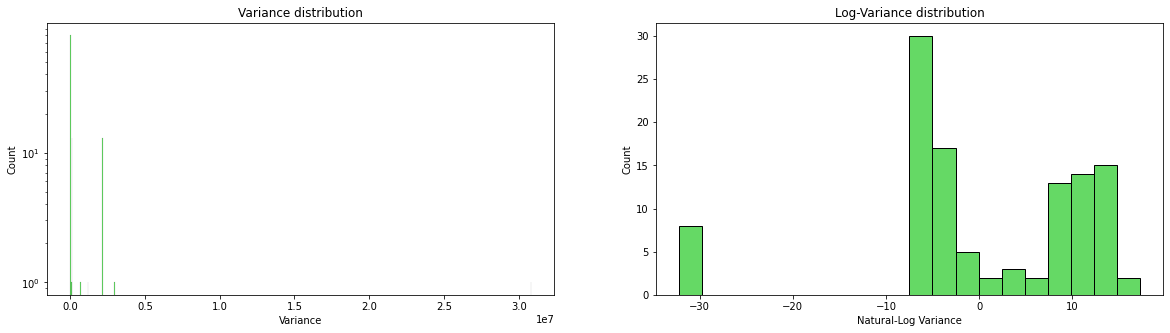

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(col_var.Variance, ax=ax[0], kde=False, color="limegreen");
sns.histplot(np.log(col_var.Variance + 1e-14), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Variance distribution")
ax[0].set_yscale("log")

ax[1].set_title("Log-Variance distribution")
ax[1].set_xlabel("Natural-Log Variance")
plt.show();

## Collecting the frequency of occurence of unique values for each column

In [ ]:
unique_CustomerId = Counter(tntt_features.CustomerID.values.tolist())
unique_StockCode = Counter(tntt_features.StockCode.values.tolist())
unique_Description = Counter(tntt_features.Description.values.tolist())
unique_InvoiceNo = Counter(tntt_features.InvoiceNo.values.tolist())
unique_Country = Counter(tntt_features.Country.values.tolist())
unique_InvoiceDate = Counter(tntt_features.InvoiceDate.values.tolist())
unique_Quantity = Counter(tntt_features.Quantity.values.tolist())

In [ ]:
tntt_features["Freq_InvoiceNo"] = tntt_features.Quantity.apply(lambda x: unique_InvoiceNo[x])
tntt_features["Freq_StockCode"] = tntt_features.Quantity.apply(lambda x: unique_StockCode[x])
tntt_features["Freq_Description"] = tntt_features.Quantity.apply(lambda x: unique_Description[x])
tntt_features["Freq_Quantity"] = tntt_features.Quantity.apply(lambda x: unique_Quantity[x])
tntt_features["Freq_InvoiceDate"] = tntt_features.Quantity.apply(lambda x: unique_InvoiceDate[x])
tntt_features["Freq_CustomerID"] = tntt_features.Quantity.apply(lambda x: unique_CustomerId[x])
tntt_features["Freq_Country"] = tntt_features.Quantity.apply(lambda x: unique_Country[x])

tntt_features.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,...,Max_stcd_InvoiceNo_group,Max_stcd_CustomerID_group,Max_stcd_Description_group,Max_stcd_Quantity_group,Max_stcd_InvoiceDate_group,Max_stcd_Country_group,Max_stcd_Date_group,Max_stcd_Time_group,Max_stcd_year_group,Max_stcd_weekofyear_group,Max_stcd_month_group,Max_stcd_dayofweek_group,Max_stcd_weekend_group,Max_In_CustomerID_group,Max_In_StockCode_group,Max_In_Description_group,Max_In_Quantity_group,Max_In_InvoiceDate_group,Max_In_Country_group,Max_In_Date_group,Max_In_Time_group,Max_In_year_group,Max_In_weekofyear_group,Max_In_month_group,Max_In_dayofweek_group,Max_In_weekend_group,Max_Quatity_type,hour,minute,second,After_12_purchase,CmnCustomer,CmnStockID,Freq_InvoiceNo,Freq_StockCode,Freq_Description,Freq_Quantity,Freq_InvoiceDate,Freq_CustomerID,Freq_Country
199481,12436,1840,3489,1,2011-09-20 12:50:00,17841.0,35,2011-09-20,12:50:00,2011,38,9,1,0,7983,7983,7983,7983,7983,7983,7983,7983,7983,7983,7983,7983,7983,190,190,190,190,190,190,190,190,190,190,190,190,190,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,50,0,12,1,0,2,21,110,73314,0,0,401
110101,2302,349,3165,12,2011-01-28 15:45:00,12377.0,32,2011-01-28,15:45:00,2011,4,1,4,0,77,77,77,77,77,77,77,77,77,77,77,77,77,328,328,328,328,328,328,328,328,328,328,328,328,328,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,45,0,15,0,0,2,329,250,60033,0,0,695
93,8243,2781,1872,1,2011-06-17 14:44:00,15356.0,35,2011-06-17,14:44:00,2011,24,6,4,0,519,519,519,519,519,519,519,519,519,519,519,519,519,258,258,258,258,258,258,258,258,258,258,258,258,258,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,44,0,14,0,0,2,21,110,73314,0,0,401


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


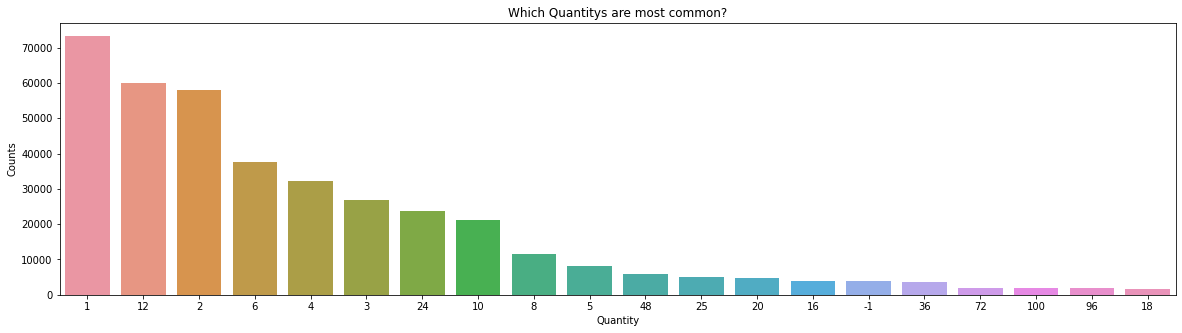

In [ ]:
Quantity_counts = tntt_features.Quantity.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(Quantity_counts.index, Quantity_counts.values, order=Quantity_counts.index)
plt.ylabel("Counts")
plt.xlabel("Quantity")
plt.title("Which Quantitys are most common?");

## Categorical Columns = Country and Quantity

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


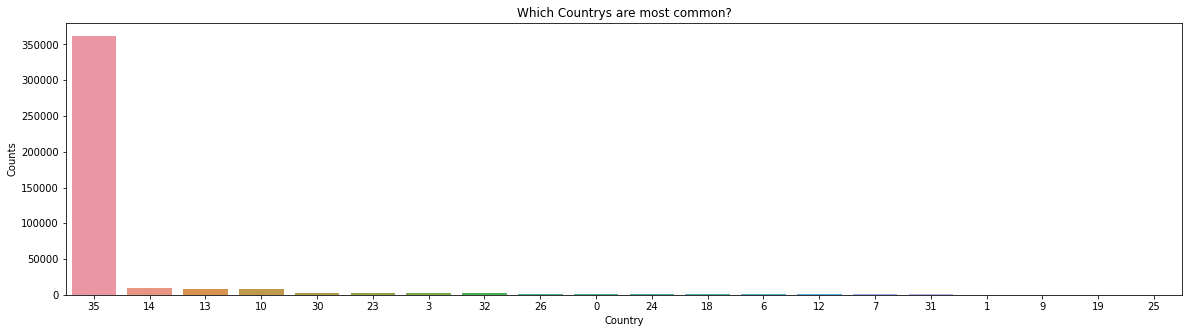

In [ ]:
Country_counts = tntt_features.Country.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(Country_counts.index, Country_counts.values, order=Country_counts.index)
plt.ylabel("Counts")
plt.xlabel("Country")
plt.title("Which Countrys are most common?");

## Peculiar Customers


In [ ]:
p_df = train_data.loc[(train_data.Quantity == 1) | (train_data.Quantity == -1)]
p_df['Actual_UnitPrice'] = p_df['UnitPrice']*p_df['Quantity']
p_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(53938, 9)

In [ ]:
df_ = p_df.groupby(["StockCode", "CustomerID"]).sum()
actual_revenue = df_.loc[(df_.Quantity == 0) & (df_.Actual_UnitPrice != 0)]
actual_revenue.head(23)

,,InvoiceNo,Description,Quantity,UnitPrice,Country,Actual_UnitPrice
StockCode,CustomerID,,,,,,
172,15311.0,26666,3890,0,3.10,70,0.20
314,15311.0,29555,3526,0,3.87,70,0.29
454,15311.0,33426,7102,0,23.70,70,1.80
890,15311.0,54719,7080,0,7.74,140,0.58
1521,14562.0,25322,5358,0,5.50,70,0.40
1535,15311.0,34725,2630,0,2.31,70,0.19
1545,15443.0,32169,2076,0,16.20,70,-0.30
1677,15257.0,22753,5796,0,250.00,70,80.00
1694,15311.0,23726,7168,0,11.90,70,0.80


In [ ]:
p_df.groupby('Quantity').sum()

,InvoiceNo,StockCode,Description,UnitPrice,CustomerID,Country,Actual_UnitPrice
Quantity,,,,,,,
-1,54792207,4693952,5396851,110728.990,40488777.0,86353,-110728.990
1,516004674,80085244,102315521,255396.004,805646837.0,1770571,255396.004


## Checking Unique Values



In [ ]:
t_cols = list(tntt_features.columns)
for col in t_cols:
    print(f"{col} has {len(tntt_features[col].unique().tolist())} values")

InvoiceNo has 22190 values
StockCode has 3684 values
Description has 3896 values
Quantity has 436 values
InvoiceDate has 20460 values
CustomerID has 4372 values
Country has 37 values
Date has 305 values
Time has 773 values
year has 2 values
weekofyear has 51 values
month has 12 values
dayofweek has 6 values
weekend has 2 values
cus_InvoiceNo_group has 474 values
cus_StockCode_group has 474 values
cus_Description_group has 474 values
cus_Quantity_group has 474 values
cus_InvoiceDate_group has 474 values
cus_Country_group has 474 values
cus_Date_group has 474 values
cus_Time_group has 474 values
cus_year_group has 474 values
cus_weekofyear_group has 474 values
cus_month_group has 474 values
cus_dayofweek_group has 474 values
cus_weekend_group has 474 values
stcd_InvoiceNo_group has 539 values
stcd_CustomerID_group has 539 values
stcd_Description_group has 539 values
stcd_Quantity_group has 539 values
stcd_InvoiceDate_group has 539 values
stcd_Country_group has 539 values
stcd_Date_group 

# Heatmap

In [ ]:
f_l = pd.concat([tntt_features.iloc[:train_limit-1, :], label], axis = 1)
f_l

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Date,Time,year,weekofyear,month,dayofweek,weekend,cus_InvoiceNo_group,cus_StockCode_group,cus_Description_group,cus_Quantity_group,cus_InvoiceDate_group,cus_Country_group,cus_Date_group,cus_Time_group,cus_year_group,cus_weekofyear_group,cus_month_group,cus_dayofweek_group,cus_weekend_group,stcd_InvoiceNo_group,stcd_CustomerID_group,stcd_Description_group,stcd_Quantity_group,stcd_InvoiceDate_group,stcd_Country_group,stcd_Date_group,stcd_Time_group,stcd_year_group,stcd_weekofyear_group,stcd_month_group,stcd_dayofweek_group,stcd_weekend_group,...,Max_stcd_CustomerID_group,Max_stcd_Description_group,Max_stcd_Quantity_group,Max_stcd_InvoiceDate_group,Max_stcd_Country_group,Max_stcd_Date_group,Max_stcd_Time_group,Max_stcd_year_group,Max_stcd_weekofyear_group,Max_stcd_month_group,Max_stcd_dayofweek_group,Max_stcd_weekend_group,Max_In_CustomerID_group,Max_In_StockCode_group,Max_In_Description_group,Max_In_Quantity_group,Max_In_InvoiceDate_group,Max_In_Country_group,Max_In_Date_group,Max_In_Time_group,Max_In_year_group,Max_In_weekofyear_group,Max_In_month_group,Max_In_dayofweek_group,Max_In_weekend_group,Max_Quatity_type,hour,minute,second,After_12_purchase,CmnCustomer,CmnStockID,Freq_InvoiceNo,Freq_StockCode,Freq_Description,Freq_Quantity,Freq_InvoiceDate,Freq_CustomerID,Freq_Country,UnitPrice
0,6141.0,1583.0,144.0,3.0,2011-05-06 16:54:00,14056.0,35.0,2011-05-06,16:54:00,2011.0,18.0,5.0,4.0,0.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,1128.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,54.0,0.0,16.0,0.0,0.0,4.0,3.0,70.0,26948.0,0.0,0.0,2069.0,3.75
1,6349.0,1300.0,3682.0,6.0,2011-05-11 07:35:00,13098.0,35.0,2011-05-11,07:35:00,2011.0,19.0,5.0,2.0,0.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,605.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,35.0,0.0,0.0,0.0,0.0,1.0,64.0,64.0,37688.0,0.0,0.0,758.0,1.95
2,16783.0,2178.0,1939.0,4.0,2011-11-20 13:20:00,15044.0,35.0,2011-11-20,13:20:00,2011.0,46.0,11.0,6.0,1.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,461.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,20.0,0.0,13.0,0.0,0.0,1.0,5.0,1.0,32183.0,0.0,0.0,32.0,5.95
3,16971.0,2115.0,2983.0,1.0,2011-11-22 12:07:00,15525.0,35.0,2011-11-22,12:07:00,2011.0,47.0,11.0,1.0,0.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,7.0,0.0,12.0,0.0,0.0,2.0,21.0,110.0,73314.0,0.0,0.0,401.0,0.83
4,6080.0,1210.0,2886.0,12.0,2011-05-06 09:00:00,13952.0,35.0,2011-05-06,09:00:00,2011.0,18.0,5.0,4.0,0.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,2.0,329.0,250.0,60033.0,0.0,0.0,695.0,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284775,3408.0,1706.0,1081.0,6.0,2011-03-01 12:07:00,17965.0,35.0,2011-03-01,12:07:00,2011.0,9.0,3.0,1

In [ ]:
f_l.shape

(284780, 122)

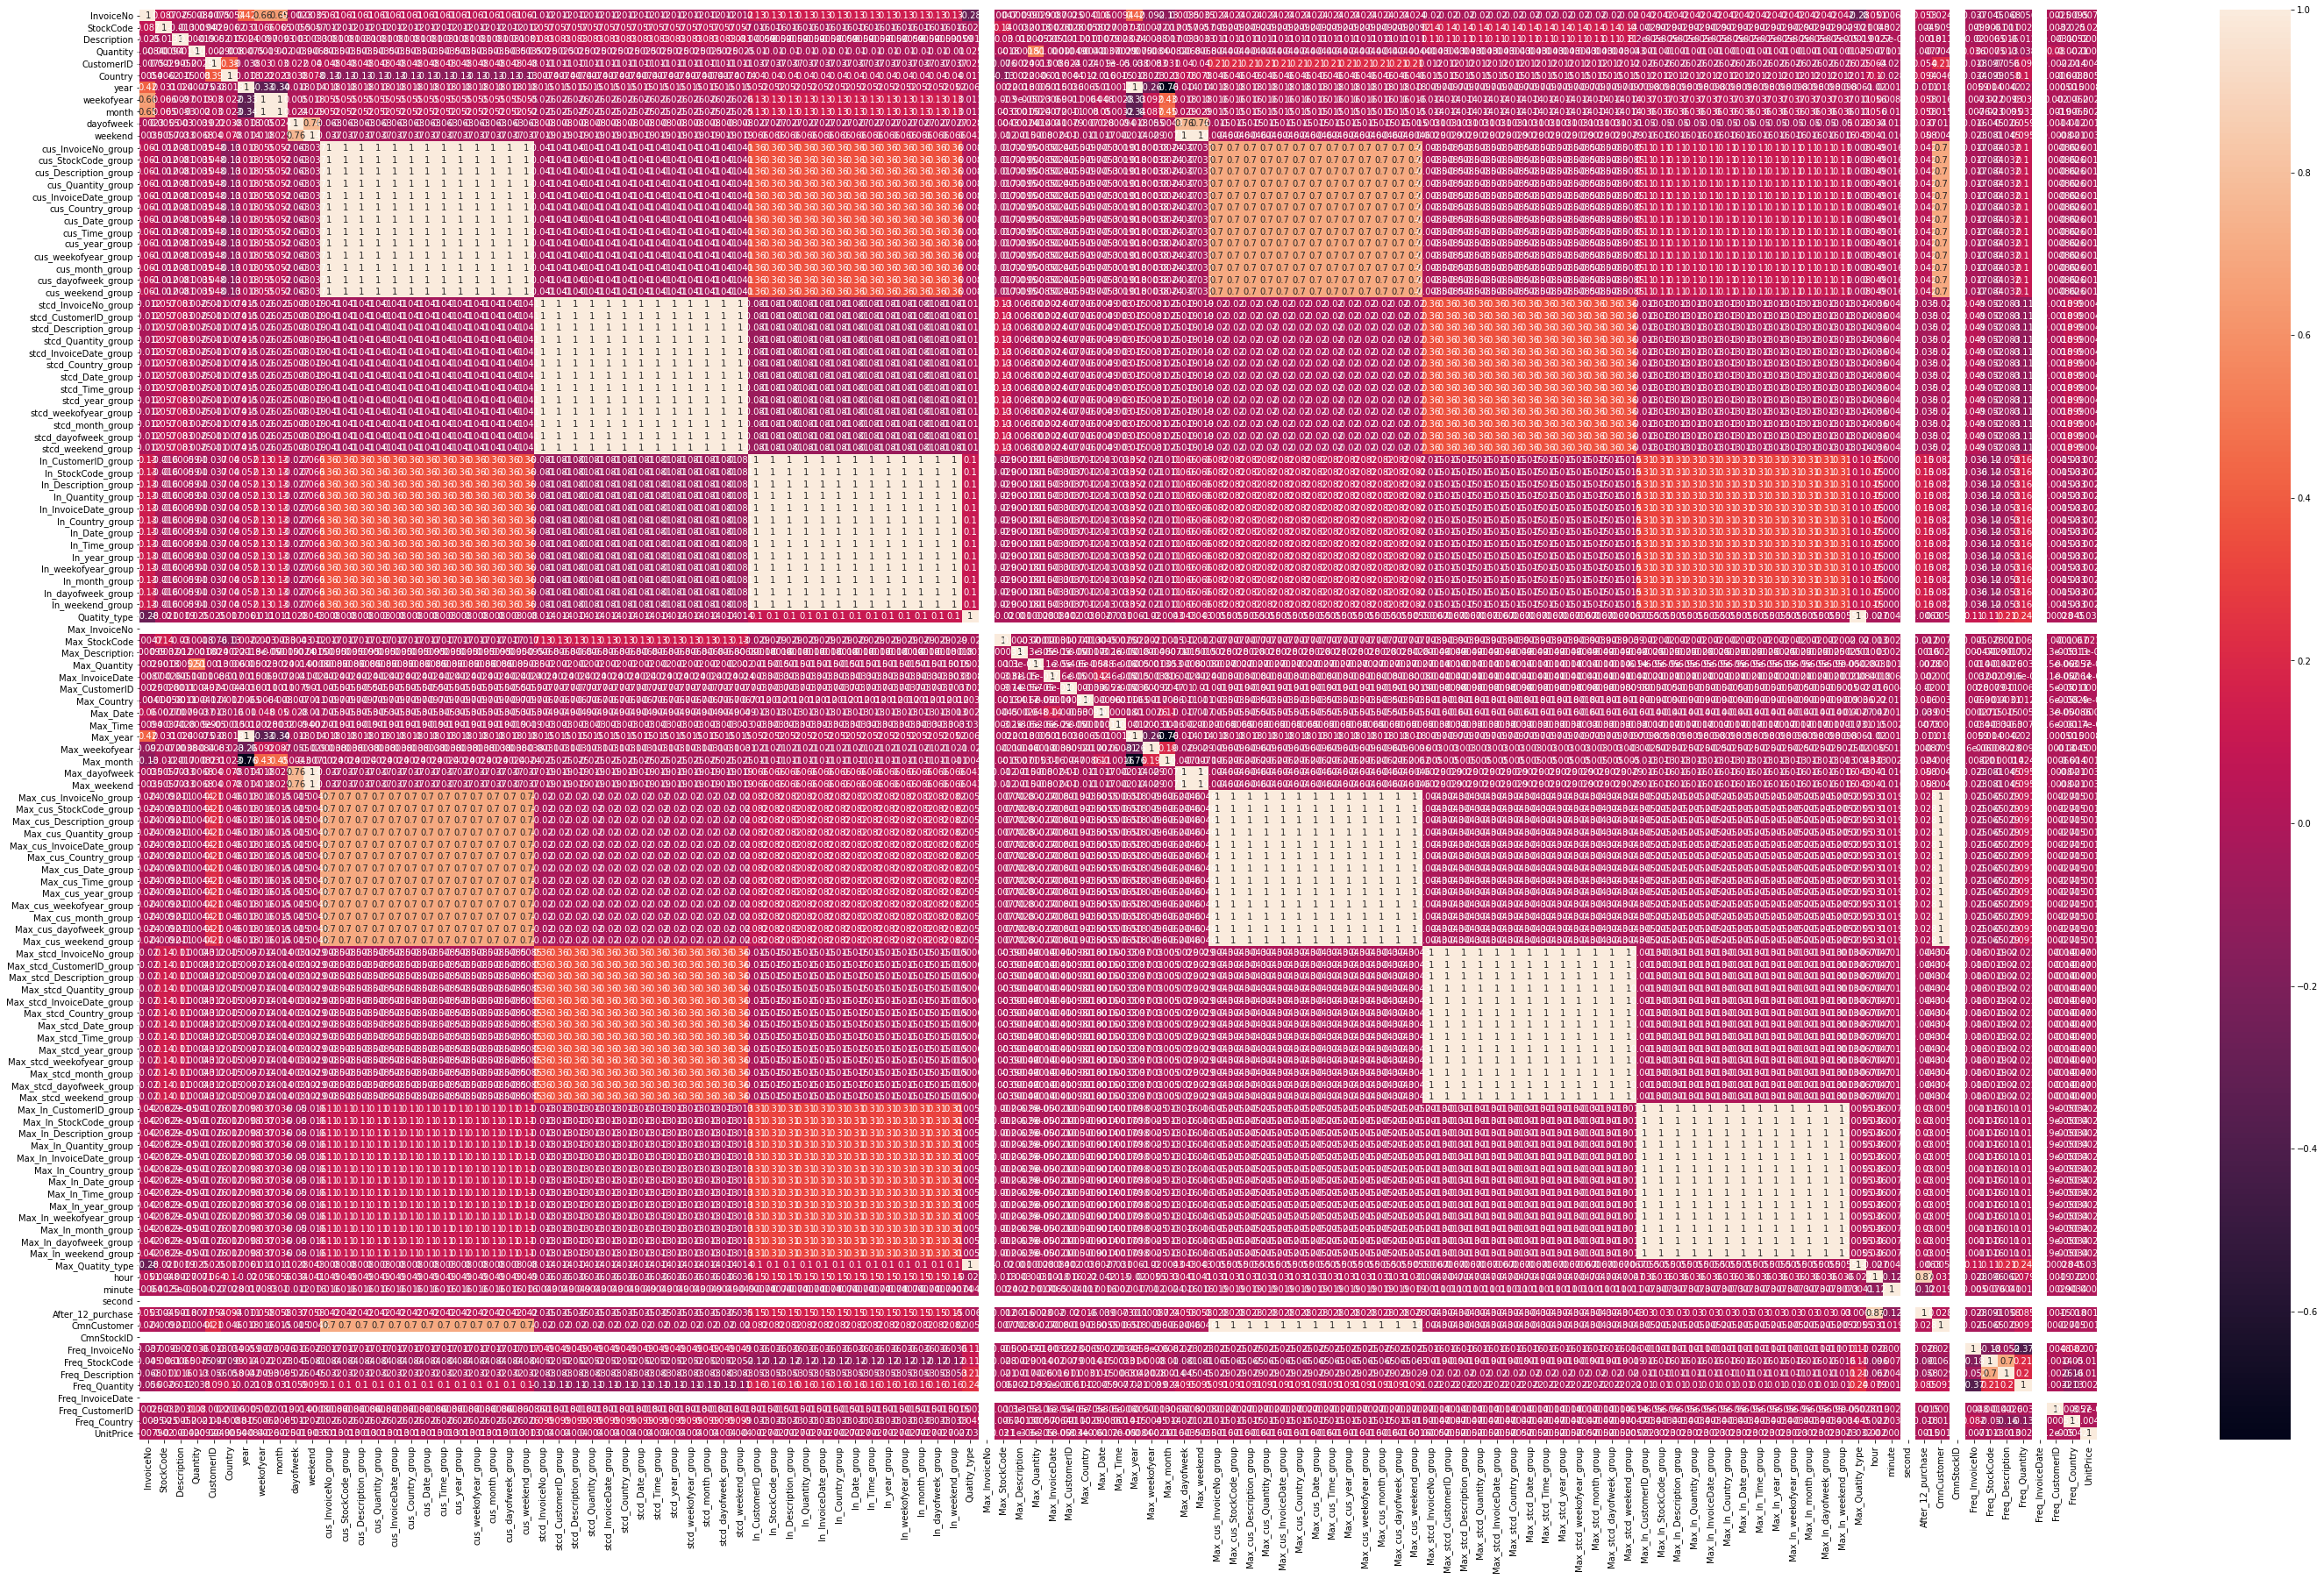

In [ ]:
_, ax = plt.subplots(figsize = (50, 30))
sns.heatmap(f_l.corr(), annot= True,  ax = ax);

In [ ]:
tntt_features.to_csv("tntt_features_EDA3.csv", index = False)